### Imports

In [0]:
# Change tensorflow version to 1.x
%tensorflow_version 1

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data


In [0]:
#Read MNIST Data
mnist_data = input_data.read_data_sets('MNIST_data/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr


### Dataset

In [0]:

import matplotlib.pyplot as plt
import numpy as np
import math

inp_batch, gt_batch = mnist_data.train.next_batch(10)
x,y = inp_batch[0], gt_batch[0]

#Checking one image and one label shapes
print(x.shape, y.shape)

#Checking a batch of images and a batch of labels shapes
print(inp_batch.shape, gt_batch.shape)

(784,) (10,)
(10, 784) (10, 10)


In [0]:
#Formatting images to matrix, from vector
def imformat(x):
  horlen = int(math.sqrt(len(x)))
  verlen = horlen

  x_imformat = x.reshape((horlen,verlen))
  return x_imformat

In [0]:
x_imformat = imformat(x)


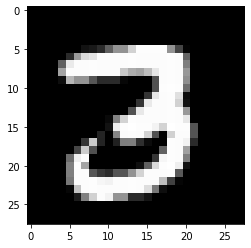

In [0]:
plt.imshow(x_imformat,cmap = 'gray')

In [0]:
print(x.max(),x.min())
print(np.amax(x),np.amin(x))

1.0 0.0
1.0 0.0


###Network

In [0]:
#Definin hyperparameters
batch_num = 50
input_shape = 784
label_shape = 10

lr = 0.003
layer_1_neurons = 200
layer_2_neurons = 80
layer_3_neurons = 10

In [0]:
# Placeholders are the things that we FEED to our tensorflow graph when
# we run our graph
inp = tf.placeholder(dtype = tf.float32 , shape = (None,input_shape))
lab = tf.placeholder(dtype = tf.float32, shape = (None, label_shape))

In [0]:
# We define our variables that we will use in our graph. 
# Think of this like we define some nodes on the graph, but we didnt define the edges yet
W1 = tf.Variable(tf.random_normal(shape = [input_shape, layer_1_neurons]))
b1 = tf.Variable(tf.random_normal(shape = [layer_1_neurons]))

W2 = tf.Variable(tf.random_normal(shape = [layer_1_neurons, layer_2_neurons]))
b2 = tf.Variable(tf.random_normal(shape = [layer_2_neurons]))

W3 = tf.Variable(tf.random_normal(shape = [layer_2_neurons, layer_3_neurons]))
b3 = tf.Variable(tf.random_normal(shape = [layer_3_neurons]))



In [0]:
# Here we finish defining everything in our computational graph

y1 = tf.nn.sigmoid(tf.matmul(inp,W1) + b1)
y2 = tf.nn.sigmoid(tf.matmul(y1,W2) + b2)
y3 = tf.nn.sigmoid(tf.matmul(y2,W3) + b3)
pred = y3

# We need loss in our comp graph to optimize it
loss = tf.nn.softmax_cross_entropy_with_logits_v2(lab,pred)

# We need tstep in our comp graph to obtain the gradients
tstep = tf.train.AdamOptimizer(lr).minimize(loss)


In [0]:
#if this is an interactive session, I won't be needing python contexts after.
sess = tf.InteractiveSession()

tf.global_variables_initializer().run()

/tensorflow-1.15.2/python3.6/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
# Our training loop
itnum = 1000
epnum = 25 

for epoch in range(epnum):
  aggloss = 0
  for itr in range(1,itnum):
    xbatch,ybatch = mnist_data.train.next_batch(batch_num)

    # I run my computational graph to obtain LOSS and TSTEP objects residing in my graph
    # I assign the obtained values to itrloss variable and _ variable (i will not use _ variable)
    # I feed my graph the INP and LAB objects. inp object is xbatch here, lab object is ybatch here
    itrloss, _ = sess.run([loss,tstep], feed_dict = {inp:xbatch, lab:ybatch})
    aggloss = aggloss + np.mean(itrloss)

  print(epoch,aggloss/itnum)


0 1.8160949313640595
1 1.6194203987121583
2 1.5903347234725953
3 1.5785366848707199
4 1.573508086323738
5 1.5703714824914932
6 1.5642617301940918
7 1.5636729874610902
8 1.561182447195053
9 1.5587798535823822
10 1.5583659211397172
11 1.5562171833515168
12 1.5563454802036285
13 1.555298061490059
14 1.5525954197645186
15 1.553447818994522
16 1.5532777903079986
17 1.5531693509817124
18 1.5504882650375367
19 1.5519714944362641
20 1.5502509319782256
21 1.550658484339714
22 1.5504472987651825
23 1.5498936094045639
24 1.5505340528488158


In [0]:
#Checking accuracy
acc = 0 
sample_size = 5000
for _ in range(sample_size):
  xtest, ytest = mnist_data.test.next_batch(50)

  # I run my graph to obtain my prediction this time. Same things apply as in the previous cell.
  testpred = sess.run([pred], feed_dict={inp:xtest, lab:ytest})
  acc = acc + int(np.argmax(ytest)==np.argmax(testpred))

acc = acc/sample_size
print(acc)

0.4726
